## Python 3.10.11

In [73]:
!pip install --default-timeout=1000 tensorflow==2.8.0 tensorflow-gpu==2.8.0 streamlit matplotlib numpy pandas

In [74]:
!pip install protobuf==3.20.0

In [18]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      2.1.0
altair                       5.3.0
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        23.2.0
blinker                      1.8.1
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
filelock                     3.13.1
flatbuffers                  24.3.25
fonttools                    4.51.0
fsspec                       2024.2.0
gast                         0.5.4
gitdb                        4.0.11
GitPython                    3.1.43
google-auth              

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
gpus = tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [21]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [22]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path = "Fruits_Vegetables/validation"

In [23]:
img_width = 180
img_height = 180

In [24]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False,
)

Found 3115 files belonging to 36 classes.


In [25]:
data_cat = data_train.class_names

In [26]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [27]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False,
)

Found 351 files belonging to 36 classes.


In [28]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False,
)

Found 359 files belonging to 36 classes.


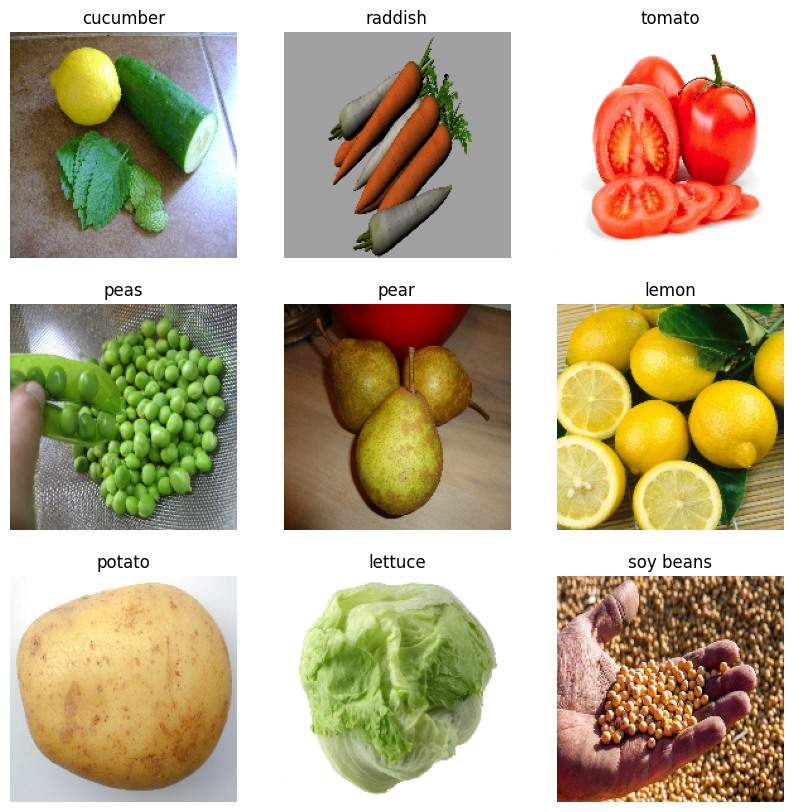

In [29]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
model = Sequential(
    [
        layers.Rescaling(1.0 / 255),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128),
        layers.Dense(len(data_cat)),
    ]
)

In [32]:
for images, _ in data_train.take(1):
    model(images)

In [33]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (32, 180, 180, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (32, 180, 180, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 90, 90, 16)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (32, 90, 90, 32)          4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 45, 45, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (32, 45, 45, 64)         

In [35]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


98/98 [==============================] - 18s 167ms/step - loss: 3.5092 - accuracy: 0.0668 - val_loss: 2.9752 - val_accuracy: 0.1766
Epoch 2/25
98/98 [==============================] - 17s 159ms/step - loss: 2.7678 - accuracy: 0.2263 - val_loss: 1.9849 - val_accuracy: 0.4473
Epoch 3/25
98/98 [==============================] - 16s 155ms/step - loss: 2.1504 - accuracy: 0.3888 - val_loss: 1.3121 - val_accuracy: 0.7009
Epoch 4/25
98/98 [==============================] - 17s 162ms/step - loss: 1.5560 - accuracy: 0.5541 - val_loss: 0.8055 - val_accuracy: 0.8120
Epoch 5/25
98/98 [==============================] - 17s 161ms/step - loss: 1.0160 - accuracy: 0.7178 - val_loss: 0.5828 - val_accuracy: 0.9031
Epoch 6/25
98/98 [==============================] - 17s 160ms/step - loss: 0.5776 - accuracy: 0.8424 - val_loss: 0.5104 - val_accuracy: 0.9288
Epoch 7/25
98/98 [==============================] - 17s 161ms/step - loss: 0.3890 - accuracy: 0.9005 - val_loss: 0.4294 - val_accuracy: 0.9430
Epoch 8/25

Text(0.5, 1.0, 'Loss')

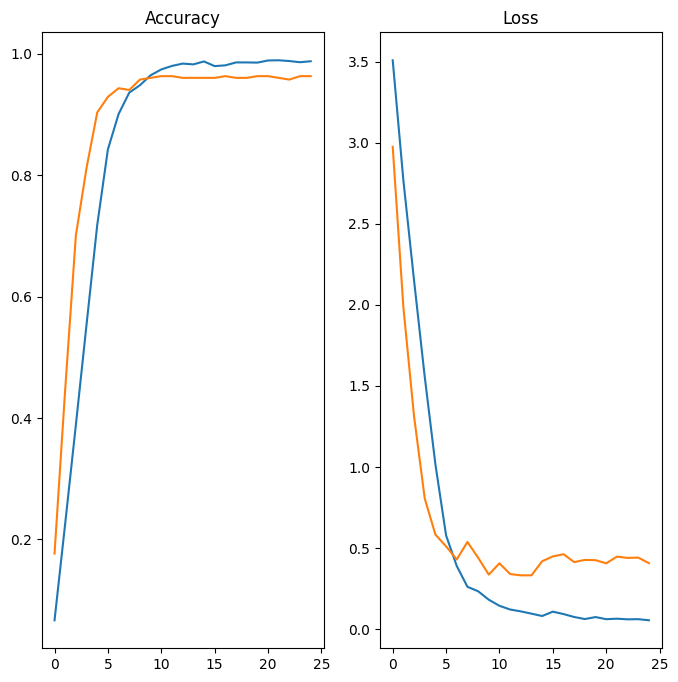

In [36]:
epoch_range = range(epochs_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, history.history["accuracy"], label="Training Accuracy")
plt.plot(epoch_range, history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epoch_range, history.history["loss"], label="Training Loss")
plt.plot(epoch_range, history.history["val_loss"], label="Validation Loss")
plt.title("Loss")

In [37]:
image = "paprika.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_arr, 0)

In [38]:
predict = model.predict(img_batch)

In [39]:
score = tf.nn.softmax(predict)

In [40]:
print(
    "vegetable/fruit in image is {} with accuracy of {:.2f}%".format(
        data_cat[np.argmax(score)], np.max(score) * 100
    )
)

vegetable/fruit in image is paprika with accuracy of 100.00%


In [41]:
model.save("Image_Classification.keras")